In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## We import out dataset from Reddit

In [2]:
df = pd.read_csv('reddit_opinion_ru_ua.csv')

In [3]:
df.head()

,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,l7ef6wc,1,Isn't domestic violence legal in Russia,worldnews,2024-06-06 17:16:12,1d9ewd7,TheWolrdsonFire,0,1,0,...,551.0,23798.0,24642.0,1405,NaN,US soldier goes on trial in Russia for threate...,0.95,1405,0,2024-06-06 10:25:13
1,l7ef4n5,1,Now do this but for every tank and artillery d...,UkraineWarVideoReport,2024-06-06 17:15:50,1d9ik3f,ismashugood,0,1,0,...,1421.0,58089.0,60199.0,279,NaN,The cost of Russia’s war,0.97,279,0,2024-06-06 13:46:17
2,l7ef3kf,1,True. I've been stunned at how deep drones hav...,ukraine,2024-06-06 17:15:41,1d9l2wm,ngometamer,0,1,0,...,34.0,34479.0,34789.0,28,NaN,Biden states US weapons will not be used to st...,0.87,28,0,2024-06-06 15:33:53
3,l7ef3i0,1,And you're delusional if you think your risk o...,worldnews,2024-06-06 17:15:40,1d9ewd7,IsPepsiOkaySir,0,1,0,...,4067.0,20572.0,24779.0,1405,NaN,US soldier goes on trial in Russia for threate...,0.95,1405,0,2024-06-06 10:25:13
4,l7ef2sg,1,No one is scared of the Russian Surface Navy. ...,worldnews,2024-06-06 17:15:34,1d9l6dk,wswordsmen,0,1,0,...,7014.0,76280.0,83436.0,95,NaN,Russian warships headed to Caribbean for drill...,0.91,95,0,2024-06-06 15:38:07


In [4]:
df.columns

Index(['comment_id', 'score', 'self_text', 'subreddit', 'created_time',
       'post_id', 'author_name', 'controversiality', 'ups', 'downs',
       'user_is_verified', 'user_account_created_time', 'user_awardee_karma',
       'user_awarder_karma', 'user_link_karma', 'user_comment_karma',
       'user_total_karma', 'post_score', 'post_self_text', 'post_title',
       'post_upvote_ratio', 'post_thumbs_ups', 'post_total_awards_received',
       'post_created_time'],
      dtype='object')

## Then use the Bag of Words (BoW) method

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm 
tqdm.pandas()

In [6]:
sia = SentimentIntensityAnalyzer()

In [7]:
sia.polarity_scores(df['self_text'][1])

{'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.9428}

In [8]:
sia.polarity_scores(df['self_text'][2])

{'neg': 0.029, 'neu': 0.925, 'pos': 0.046, 'compound': 0.1779}

Now let's try running the sia polarity on the entire dataset

In [9]:
df['self_text'] = df['self_text'].fillna('')

In [10]:
res = {}

for i, row in tqdm(df.iterrows(), total = len(df)):
    text = str(row['self_text'])
    myid = row['comment_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1309519 [00:00<?, ?it/s]

In [11]:
res

{'l7ef6wc': {'neg': 0.158, 'neu': 0.462, 'pos': 0.38, 'compound': 0.4449},
 'l7ef4n5': {'neg': 0.325, 'neu': 0.675, 'pos': 0.0, 'compound': -0.9428},
 'l7ef3kf': {'neg': 0.029, 'neu': 0.925, 'pos': 0.046, 'compound': 0.1779},
 'l7ef3i0': {'neg': 0.161, 'neu': 0.839, 'pos': 0.0, 'compound': -0.6369},
 'l7ef2sg': {'neg': 0.141, 'neu': 0.525, 'pos': 0.334, 'compound': 0.7906},
 'l7ef2lz': {'neg': 0.162, 'neu': 0.707, 'pos': 0.131, 'compound': -0.1531},
 'l7ef20r': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'l7ef1qa': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'l7ef1kr': {'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'compound': 0.0258},
 'l7ef0zz': {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.1759},
 'l7ef0lw': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'l7ef0nc': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'l7ef04m': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'l7eezyx': {'neg': 0.075, 'neu': 0.861, 'pos': 0.064, 'compoun

In [12]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarancibia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
vaders = pd.DataFrame(res).T

In [14]:
vaders

,neg,neu,pos,compound
l7ef6wc,0.158,0.462,0.380,0.4449
l7ef4n5,0.325,0.675,0.000,-0.9428
l7ef3kf,0.029,0.925,0.046,0.1779
l7ef3i0,0.161,0.839,0.000,-0.6369
l7ef2sg,0.141,0.525,0.334,0.7906
...,...,...,...,...
cmqs3d9,0.047,0.866,0.087,0.8494
cmf3xhd,0.000,1.000,0.000,0.0000
cm4iugq,0.000,1.000,0.000,0.0000
cm3dnw7,0.000,0.432,0.568,0.6784


In [15]:
vaders.index.name = 'comment_id'

In [16]:
vaders.reset_index(inplace=True)

In [17]:
vaders

,comment_id,neg,neu,pos,compound
0,l7ef6wc,0.158,0.462,0.380,0.4449
1,l7ef4n5,0.325,0.675,0.000,-0.9428
2,l7ef3kf,0.029,0.925,0.046,0.1779
3,l7ef3i0,0.161,0.839,0.000,-0.6369
4,l7ef2sg,0.141,0.525,0.334,0.7906
...,...,...,...,...,...
1309514,cmqs3d9,0.047,0.866,0.087,0.8494
1309515,cmf3xhd,0.000,1.000,0.000,0.0000
1309516,cm4iugq,0.000,1.000,0.000,0.0000
1309517,cm3dnw7,0.000,0.432,0.568,0.6784


In [18]:
vaders = vaders.merge(df, how='left', on='comment_id')

In [19]:
vaders.head()

,comment_id,neg,neu,pos,compound,score,self_text,subreddit,created_time,post_id,...,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
0,l7ef6wc,0.158,0.462,0.380,0.4449,1,Isn't domestic violence legal in Russia,worldnews,2024-06-06 17:16:12,1d9ewd7,...,551.0,23798.0,24642.0,1405,NaN,US soldier goes on trial in Russia for threate...,0.95,1405,0,2024-06-06 10:25:13
1,l7ef4n5,0.325,0.675,0.000,-0.9428,1,Now do this but for every tank and artillery d...,UkraineWarVideoReport,2024-06-06 17:15:50,1d9ik3f,...,1421.0,58089.0,60199.0,279,NaN,The cost of Russia’s war,0.97,279,0,2024-06-06 13:46:17
2,l7ef3kf,0.029,0.925,0.046,0.1779,1,True. I've been stunned at how deep drones hav...,ukraine,2024-06-06 17:15:41,1d9l2wm,...,34.0,34479.0,34789.0,28,NaN,Biden states US weapons will not be used to st...,0.87,28,0,2024-06-06 15:33:53
3,l7ef3i0,0.161,0.839,0.000,-0.6369,1,And you're delusional if you think your risk o...,worldnews,2024-06-06 17:15:40,1d9ewd7,...,4067.0,20572.0,24779.0,1405,NaN,US soldier goes on trial in Russia for threate...,0.95,1405,0,2024-06-06 10:25:13
4,l7ef2sg,0.141,0.525,0.334,0.7906,1,No one is scared of the Russian Surface Navy. ...,worldnews,2024-06-06 17:15:34,1d9l6dk,...,7014.0,76280.0,83436.0,95,NaN,Russian warships headed to Caribbean for drill...,0.91,95,0,2024-06-06 15:38:07


In [20]:
vaders_short = vaders[['comment_id','neg', 'neu', 'pos', 'compound','self_text']]

In [21]:
vaders_short

,comment_id,neg,neu,pos,compound,self_text
0,l7ef6wc,0.158,0.462,0.380,0.4449,Isn't domestic violence legal in Russia
1,l7ef4n5,0.325,0.675,0.000,-0.9428,Now do this but for every tank and artillery d...
2,l7ef3kf,0.029,0.925,0.046,0.1779,True. I've been stunned at how deep drones hav...
3,l7ef3i0,0.161,0.839,0.000,-0.6369,And you're delusional if you think your risk o...
4,l7ef2sg,0.141,0.525,0.334,0.7906,No one is scared of the Russian Surface Navy. ...
...,...,...,...,...,...,...
1309514,cmqs3d9,0.047,0.866,0.087,0.8494,"Article is in Estonian, but here's my English ..."
1309515,cmf3xhd,0.000,1.000,0.000,0.0000,I have iPhone
1309516,cm4iugq,0.000,1.000,0.000,0.0000,Merkel actually left at the same time.
1309517,cm3dnw7,0.000,0.432,0.568,0.6784,Lol that title. You cant deny an accusation.


In [22]:
import seaborn as sns

<AxesSubplot:>

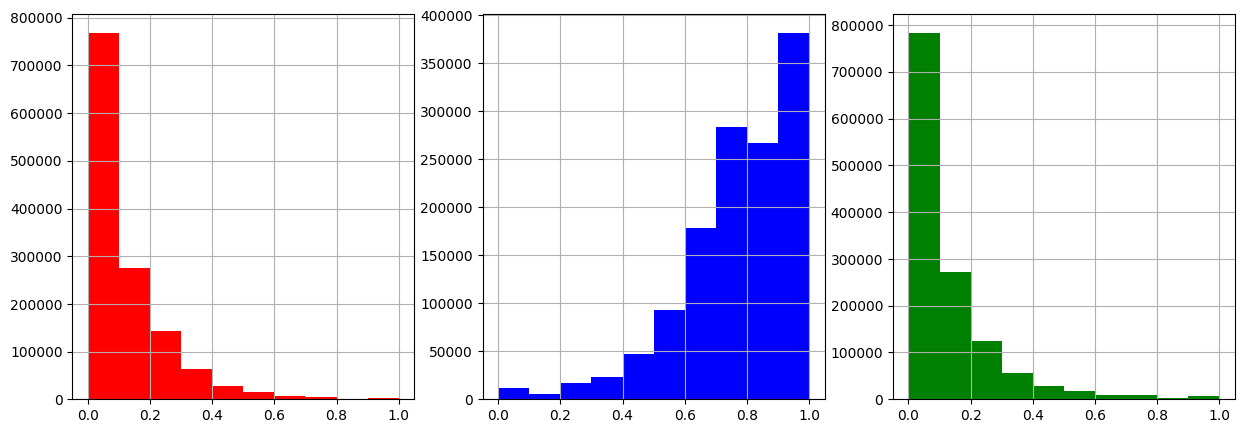

In [23]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
vaders['neg'].hist(ax=axes[0], color='red')
vaders['neu'].hist(ax=axes[1], color='blue')
vaders['pos'].hist(ax=axes[2], color='green')

<AxesSubplot:>

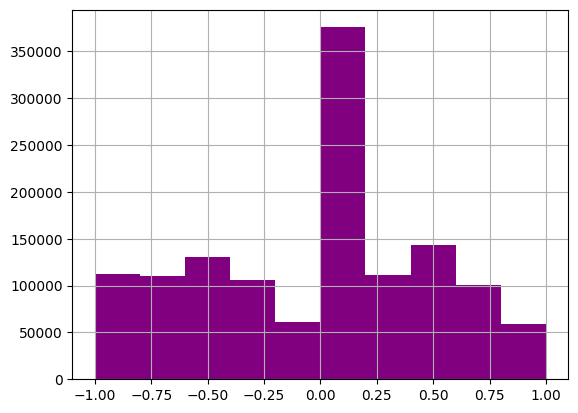

In [24]:
vaders['compound'].hist(color = 'purple')

<AxesSubplot:>

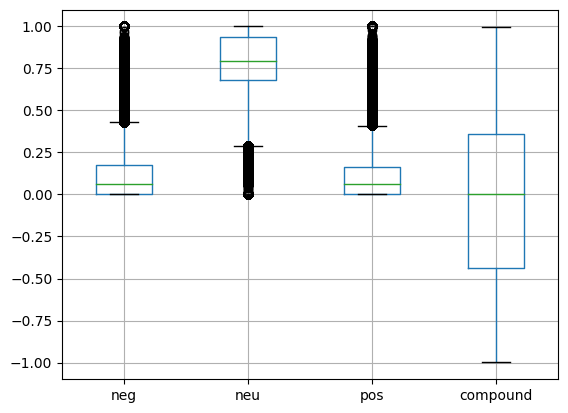

In [25]:
# Box Plot

sentiment_df = vaders[['neg', 'neu', 'pos', 'compound']]

sentiment_df.boxplot()

In [26]:
# A word cloud

from wordcloud import WordCloud

In [31]:
all_text = ' '.join(vaders['self_text'].dropna())

In [46]:
# Only the negative ones

negative_reviews = vaders[vaders['neg'] > 0.9] 

# Only the positive ones

positive_reviews = vaders[vaders['pos']> 0.9]

In [47]:
negative_text = ' '.join(negative_reviews['self_text'].dropna())

positive_text = ' '.join(positive_reviews['self_text'].dropna())

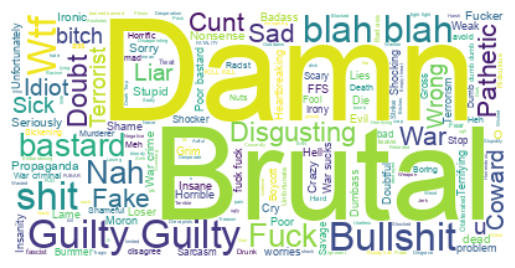

In [48]:
# Now we create the word cloud

# Negative reviews cloud

word_cloud = WordCloud(background_color='white', font_path='/Library/Fonts/Arial.ttf').generate(negative_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

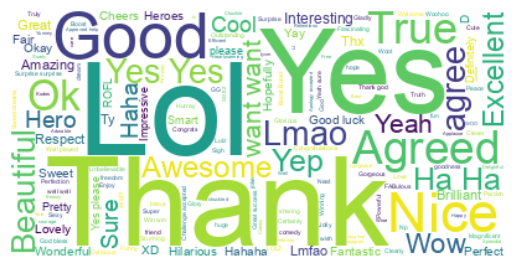

In [49]:
# Positive reviews cloud

word_cloud = WordCloud(background_color='white', font_path='/Library/Fonts/Arial.ttf').generate(positive_text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

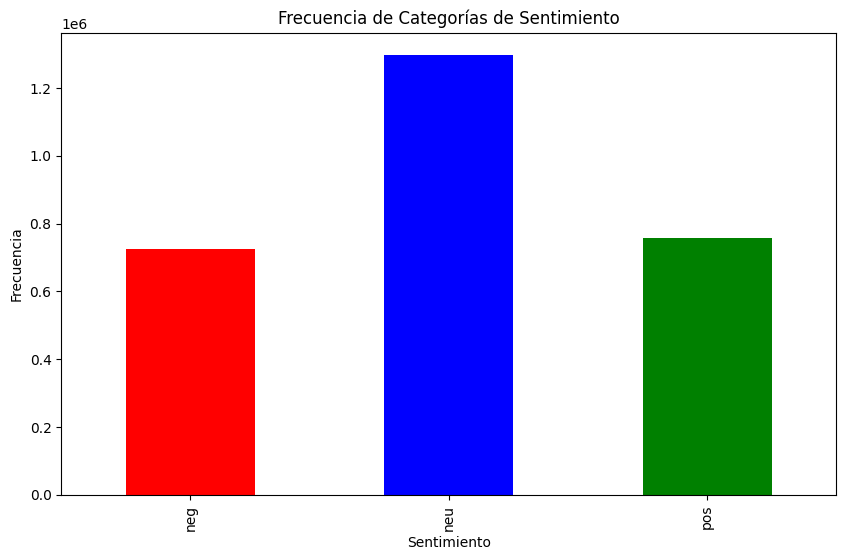

In [29]:
sentiment_counts = vaders[['neg', 'neu', 'pos']].apply(lambda x: x > 0).sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Frecuencia de Categorías de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()